In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

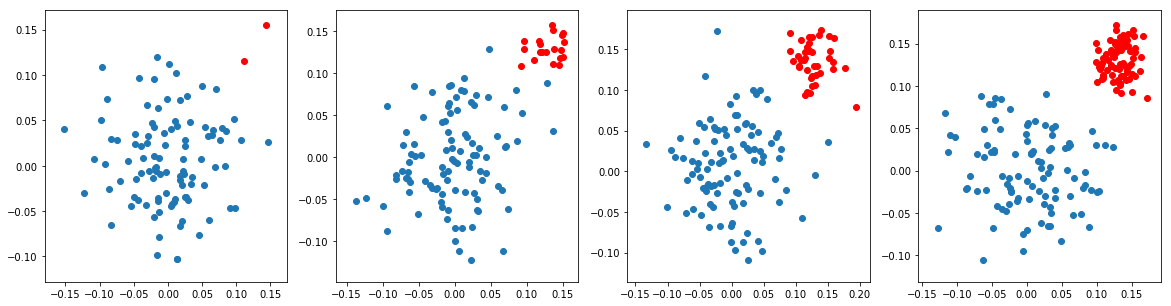

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

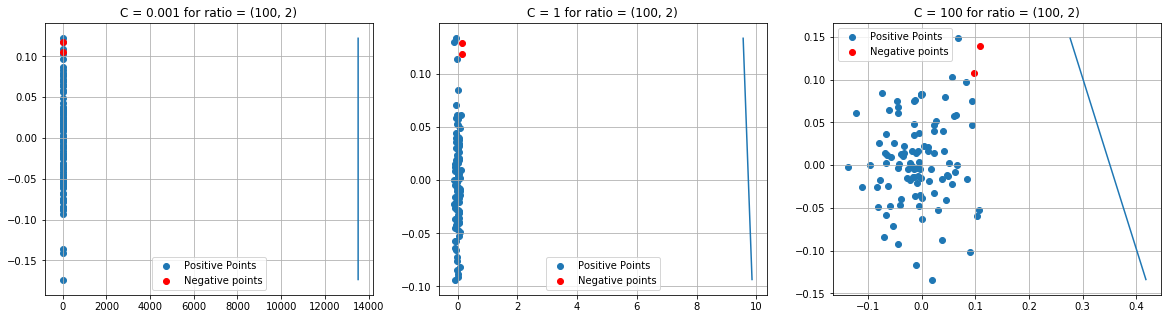

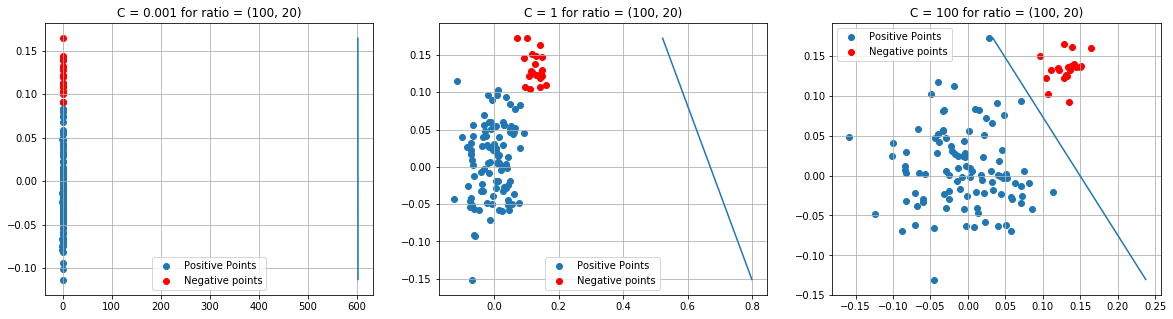

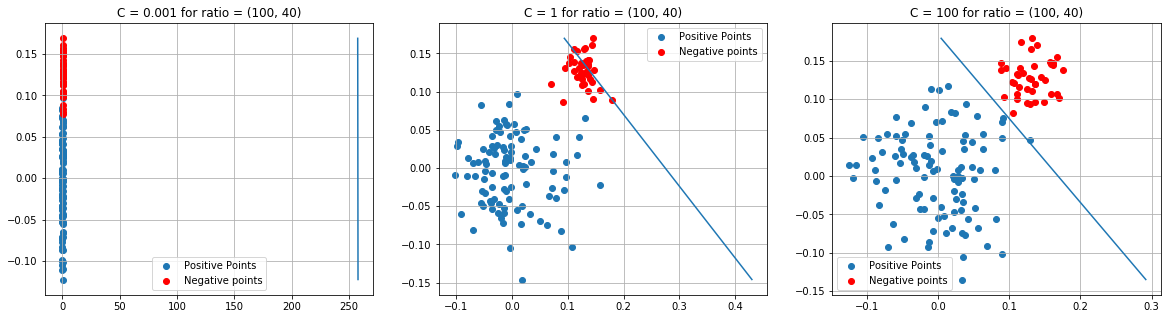

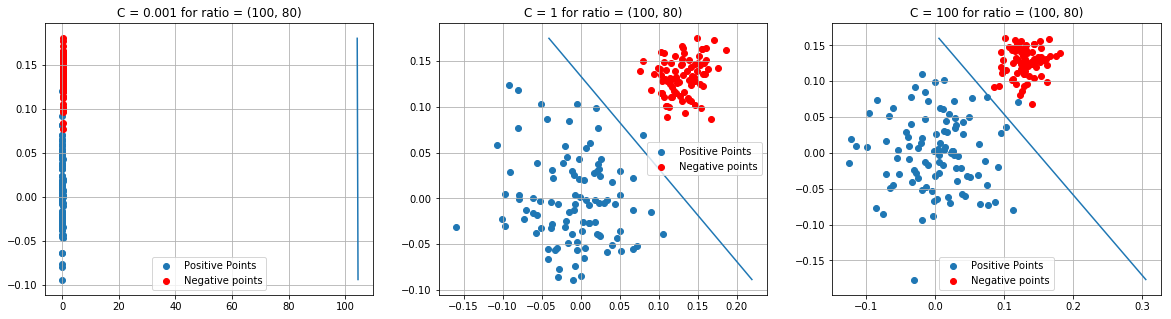

In [31]:
from sklearn.svm import SVC
np.random.seed(15)
C_ = [0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

for j,i in enumerate(ratios):
    plt.figure(figsize=(20,5))
    
    for k in range(len(C_)):
        plt.subplot(1, 3, k+1)
        
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        
    
        classifier = SVC(kernel = 'linear', C = C_[k],random_state=15)
        classifier.fit(X,y)
        intercept = classifier.intercept_
        coef = classifier.coef_[0]
        sv = classifier.support_vectors_
        mi = np.min(X[:,1])
        ma = np.max(X[:,1])
        draw_line(coef,intercept, mi, ma)
        plt.scatter(X_p[:,0],X_p[:,1],label='Positive Points')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label='Negative points')
        #plt.scatter(sv[:,0],sv[:,1],color="black",label='support vectors')
        plt.title('C = {} for ratio = {}'.format(C_[k],i))
        plt.grid()
        plt.legend()

    plt.show()

### Observation:

The optimization problem in SVM has two terms:

* A regularization term that benefits "simpler" weights

*  A loss term that makes sure that that the weights classify the training data points correctly.

The hyperparameter C is just to maintain equilibrium between the above two terms.Large value of C will result in a Hard margin classifier while small values of C will result in a wider margin.

* From the above plot we can observe:
  
  1) C = 0.001
  
  * Since the hyperparameter C is very small,the model will have a wide margin which tends to result in a hyperplane far away from the data points as seen in all 4 datasets for C=0.001. The model is underfitting.
  
  2) C=1
  
  * For Dataset1(100,2), the hyperplane is far away and the negative points are not visible.The model is underfitting.
  
  * For Dataset2(100,20), the hyperplane is moving closer to the points and  but the model is underfitting.
  
  * For Dataset3(100,40) , the model is better than previous two datasets but is still underfitting and misclassifying all the points.
  
  * For Dataset4(100,80), the dataset is fairly balanced compared to other datasets and the model is able to classify positive points from negative points with few misclassifying points.
  
  3) C=100
  
  * For Dataset1(100,2), the model is slightly underfitted but better than previous c=0.001,c=1.
  
  * For Dataset2 and Dataset3 the model seems to fit well but might be slightly overfitted,
  
  * The Hyperplane is perfectly classifying the points for Dataset4.

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

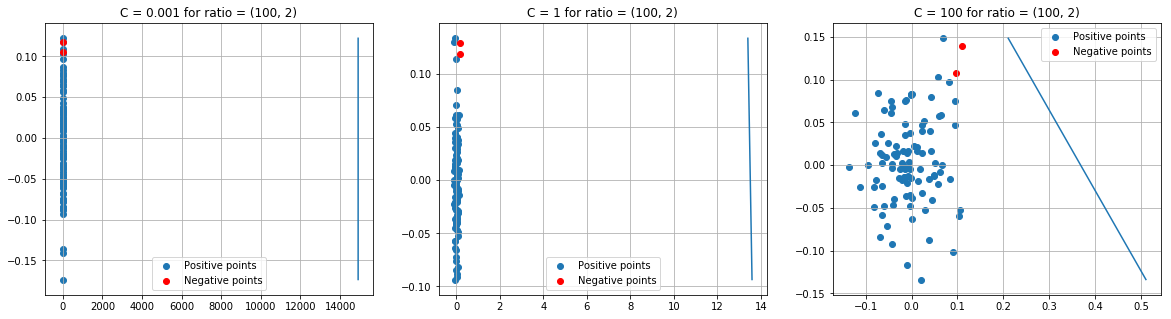

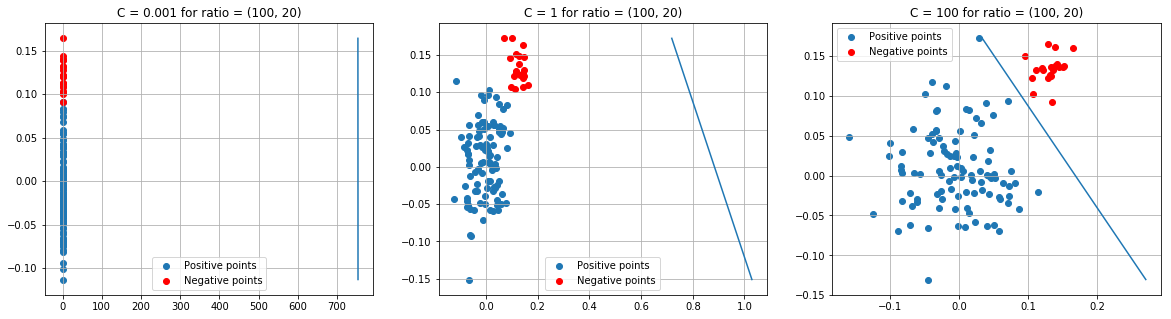

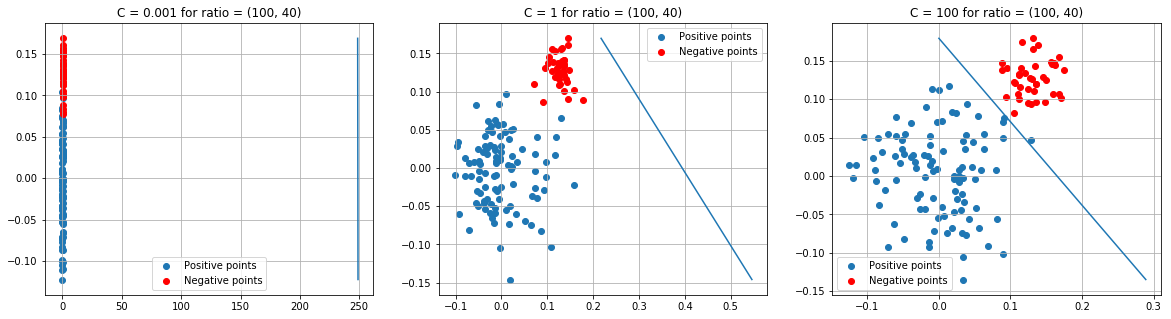

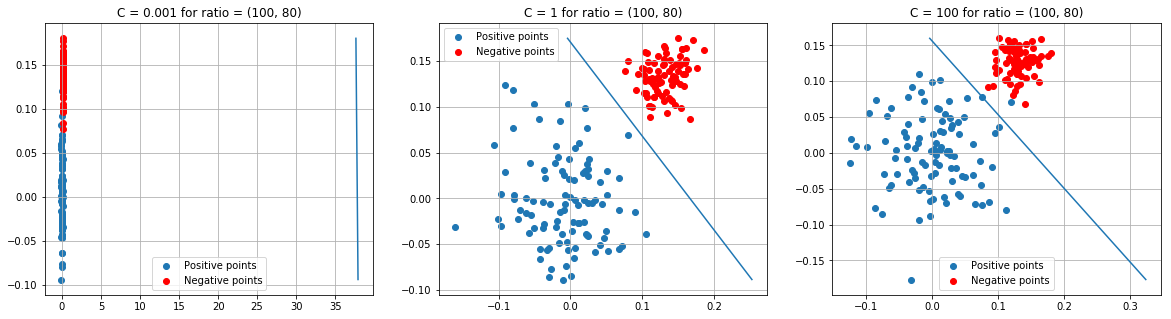

In [32]:
np.random.seed(15)
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
C_=[0.001,1,100]
for j,i in enumerate(ratios):
    plt.figure(figsize=(20,5))
    
    for k in range(len(C_)):
        plt.subplot(1, 3, k+1)
       
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))

        classifier=LogisticRegression(C=C_[k],random_state=15)
        classifier.fit(X,y)
        coef=classifier.coef_[0]
        weights=classifier.intercept_
        mini=np.min(X[:,1])
        maxi=np.max(X[:,1])
        
        draw_line(coef,weights,mini,maxi)
        plt.scatter(X_p[:,0],X_p[:,1],label='Positive points')
        plt.scatter(X_n[:,0],X_n[:,1],color='red',label='Negative points')
        plt.title('C = {} for ratio = {}'.format(C_[k],i))
        plt.grid()
        plt.legend()
    plt.show()

### Observation for logisitc regression:

D1 = 100:2 D2 = 100:20 D3 = 100: 40 D4 = 100 : 80

From the above plots,we can observe :

1)For C = 0.1
 
 * In all the 4 Datasets, the hyperplane is very far away from the points and hence the model is underfitting

2) C = 1

* In this case as we move from D1 to D4 , the hyperplane is trying to align towards to the data points.

* For D1 the model is severely underfitted while the hyperplane is moving closer to the datapoints as the dataset gradually becomes balanced but still D2,D3 are underfitted.

* In D4 as the dataset becomes fairly balanced,the hyperplane is able to differentiate between the classes correctly.

3)C=100

* For D1, as the value of C increases the hyperplane aligns itself towards the points even though the dataset is significantly imbalanced.The model is underfitted but better than previous models for C=0.001 and 1.

* For D2 and D3, the hyperplane is able to separate most of the points and produces better results than previous models.

* For D4, the models fits perfectly well.

Conclusion : We can conclude that the Logistric Regression does not perform well when C is low and when the data is highly imbalanced.